   %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic  Unnamed: 5  \
0     43.2555       30.8421      25.9025   6.3     Yes         NaN   
1     45.6033       28.1900      26.2067  13.5      No         NaN   
2     45.0107       28.9677      26.0215  11.7      No         NaN   
3     44.5398       28.9899      26.4703  13.5      No         NaN   
4     43.2870       30.6972      26.0158  12.4      No         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0         NaN         NaN         NaN         NaN          NaN         NaN  
1         NaN         NaN         NaN         NaN          NaN         NaN  
2         NaN         NaN         NaN         NaN          NaN         NaN  
3         NaN         NaN         NaN         NaN          NaN         NaN  
4         NaN         NaN         NaN         NaN          NaN         NaN  
%Red Pixel        0
%Green pixel      0
%Blue pixel       0
Hb                0
Anaemic           0
Unnamed: 5      1

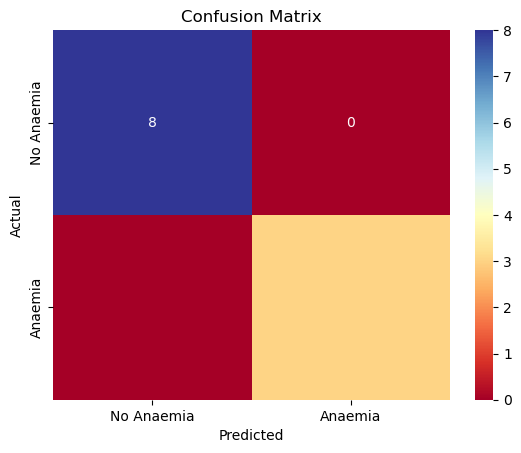

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('anemia_dataset.xlsx - Dataset_test 1 - Copy.csv')

# Explore the dataset
print(df.head())
print(df.isnull().sum())
print(df['Anaemic'].value_counts())

# Preprocess the data
X = df[['%Red Pixel', '%Green pixel', '%Blue pixel']]

# Convert 'Yes' and 'No' to binary labels (1 and 0) for 'Anaemic' column
df['Anaemic'] = df['Anaemic'].map({'Yes': 1, 'No': 0})
y = df['Anaemic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Choose a machine learning model and train it
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlBu', xticklabels=['No Anaemia', 'Anaemia'], yticklabels=['No Anaemia', 'Anaemia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Mean Squared Error: 1.7236851249999936


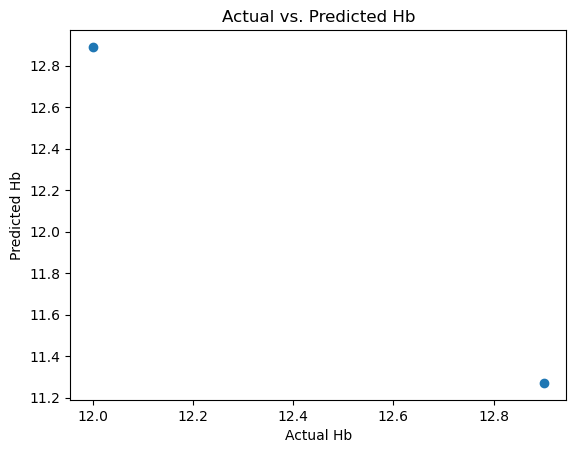

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preprocess the data
X = df[['%Red Pixel', '%Green pixel', '%Blue pixel']]
Y = df['Hb']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=42)

# Choose a machine learning model and train it
hb_model = RandomForestRegressor(random_state=42)
hb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = hb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Hb')
plt.ylabel('Predicted Hb')
plt.title('Actual vs. Predicted Hb')
plt.show()


In [19]:
import cv2
import numpy as np
# Replace with your image path
#image_path = "E:\ML Project\Anemia\16-Figure1-1.png"
# Read the image
image = cv2.imread('anemia.jpg')

# Checking if the image is successfully loaded
if image is not None:
    # Calculate average RGB values
    average_color = np.mean(image, axis=(0, 1))

    # Print or use the average RGB values as needed
    print(f"Average RGB values: (R={average_color[2]}, G={average_color[1]}, B={average_color[0]})")

    # Reshape the average RGB values for prediction
    input_rgb = average_color.reshape(1, -1)

    prediction = model.predict(input_rgb)
    hb_prediction= hb_model.predict(input_rgb)

    # Print the predicted pH value
    print("You have:", prediction [0])
    print("hb level is:", hb_prediction[0])

else:
    print(f"Error: Unable to load the image at {image_path}")


Average RGB values: (R=171.9620802919708, G=138.87412408759124, B=122.95233576642336)
You have: 0
hb level is: 9.981000000000003


D:\AnaConda-01\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\AnaConda-01\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\AnaConda-01\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\AnaConda-01\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [20]:
import joblib 
joblib.dump(hb_model,'hb_model.pkl')

['hb_model.pkl']

In [21]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [24]:
import gradio as gr
import numpy as np
import joblib

# Loaded models
anaemia_model = joblib.load('model.pkl')
hb_model = joblib.load('hb_model.pkl')

def predict_anemia(image, age_group, sex):
    # Calculate average RGB values
    average_color = np.mean(image, axis=(0, 1))

    # Mapping age groups to numerical values
    age_mapping = {'Infant': 0, 'Children': 1, 'Teens': 2, 'Adults': 3}
    age = age_mapping.get(age_group, 0)  # Default to Infant if not found

    input_features = np.concatenate([average_color, np.array([age, sex])]).reshape(1, -1)

    # Anaemia prediction
    anaemia_prediction = anaemia_model.predict(input_features)[0]
    hb_level = hb_model.predict(input_features)[0]

    if anaemia_prediction == 0:
        return f"Congratulations! You are not anemic\nYour Hb level is: {hb_level}"
    else:
        return f"Unfortunately, you are anemic.\nYour Hb level is: {hb_level}"

# Defining the Gradio interface
iface = gr.Interface(
    fn=predict_anemia,
    inputs=[
        gr.Image(),
        gr.Radio(['Infant', 'Children', 'Teens', 'Adults'], label="Age Group"),
        gr.Radio(["Male", "Female"], label="Sex"),
    ],
    outputs="text",
    live=False,
    title='Anemia Prediction'
)

iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://a01d9f22bece417719.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
